# Late-time evolution of nonlinear gravitational collapse by Burko & Ori
##  Geoff Cope
##  Univeristy of Utah
##  December 25, 2021  Christmas Day AND Launch of JWST!!

https://arxiv.org/abs/gr-qc/9703067

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u,v,theta,phi,du,dv,dtheta,dphi = symbols('u v theta phi du dv dtheta dphi')

In [4]:
f = Function('f')(u,v)
f

In [46]:
r = Function('r')(u,v)
r

In [6]:
variables = Matrix([u,v,theta,phi])
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎣φ⎦

In [7]:
differentials = Matrix( [du,dv,dtheta,dphi] ) 
differentials

⎡  du  ⎤
⎢      ⎥
⎢  dv  ⎥
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎣ dphi ⎦

In [8]:
lineElement = expand(- f*du*dv + r**2 * (dtheta**2 + sin(theta)**2 * dphi**2 ) ) 
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡           -f(u, v)                             ⎤
⎢    0      ─────────     0             0        ⎥
⎢               2                                ⎥
⎢                                                ⎥
⎢-f(u, v)                                        ⎥
⎢─────────      0         0             0        ⎥
⎢    2                                           ⎥
⎢                                                ⎥
⎢                       2                        ⎥
⎢    0          0      r (u, v)         0        ⎥
⎢                                                ⎥
⎢                                 2          2   ⎥
⎣    0          0         0      r (u, v)⋅sin (θ)⎦

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡           -f(u, v)                             ⎤
⎢    0      ─────────     0             0        ⎥
⎢               2                                ⎥
⎢                                                ⎥
⎢-f(u, v)                                        ⎥
⎢─────────      0         0             0        ⎥
⎢    2                                           ⎥
⎢                                                ⎥
⎢                       2                        ⎥
⎢    0          0      r (u, v)         0        ⎥
⎢                                                ⎥
⎢                                 2          2   ⎥
⎣    0          0         0      r (u, v)⋅sin (θ)⎦

In [12]:
from einsteinpy.symbolic import *

In [29]:
syms = sympy.symbols("u v r theta")
u,v,r,theta = syms

In [30]:
metric = MetricTensor(m,syms)

In [31]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡⎡∂                                                                   ⎤  ⎡0       0                 0                      
⎢⎢──(f(u, v))                                                         ⎥  ⎢                                                 
⎢⎢∂u                                                                  ⎥  ⎢   ∂                                             
⎢⎢───────────  0            0                          0              ⎥  ⎢   ──(f(u, v))                                   
⎢⎢  f(u, v)                                                           ⎥  ⎢   ∂v                                            
⎢⎢                                                                    ⎥  ⎢0  ───────────            0                      
⎢⎢     0       0            0                          0              ⎥  ⎢     f(u, v)                                     
⎢⎢                                                                    ⎥  ⎢                                                 
⎢⎢      

In [32]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡      ⎛            2                                   ⎞                                                                  
⎢      ⎜           ∂             ∂           ∂          ⎟              2                2                                  
⎢    2⋅⎜- f(u, v)⋅───(r(u, v)) + ──(f(u, v))⋅──(r(u, v))⎟             ∂                ∂              ∂           ∂        
⎢      ⎜            2            ∂u          ∂u         ⎟         2⋅─────(r(u, v))   ─────(f(u, v))   ──(f(u, v))⋅──(f(u, v
⎢      ⎝          ∂u                                    ⎠           ∂v ∂u            ∂v ∂u            ∂u          ∂v       
⎢    ────────────────────────────────────────────────────       - ──────────────── - ────────────── + ─────────────────────
⎢                      f(u, v)⋅r(u, v)                                r(u, v)           f(u, v)                2           
⎢                                                                                                             f (u, v)     
⎢       

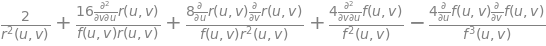

In [17]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [60]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                            ⎛            2                                   ⎞            
⎢                                                            ⎜           ∂             ∂           ∂          ⎟            
⎢                                                          2⋅⎜- f(u, v)⋅───(r(u, v)) + ──(f(u, v))⋅──(r(u, v))⎟            
⎢                                                            ⎜            2            ∂u          ∂u         ⎟            
⎢                                                            ⎝          ∂u                                    ⎠            
⎢                                                          ────────────────────────────────────────────────────            
⎢                                                                            f(u, v)⋅r(u, v)                               
⎢                                                                                                                          
⎢       

In [23]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢     ⎡                                                               2                                          ⎤                   
⎢     ⎢                                                              ∂              ∂           ∂                ⎥                   
⎢     ⎢                                                  - f(u, v)⋅─────(f(u, v)) + ──(f(u, v))⋅──(f(u, v))      ⎥                   
⎢     ⎢                                                       

In [24]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                             

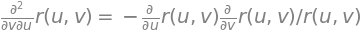

In [51]:
equation6 = Eq( diff(r,v,u),solve(simplify(Ric.tensor())[2,2].args[2] , diff(r,v,u) )[0])
equation6

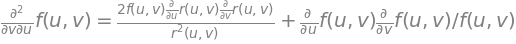

In [79]:
equation7 = Eq(diff(f,u,v),solve( expand(einst.tensor()[2,2].args[1].args[2].subs(equation6.args[0],equation6.args[1])) , diff(f,u,v) )[0])
equation7

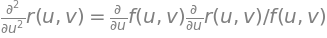

In [85]:
equation8 =  Eq(diff(r,u,u),solve( simplify(einst.tensor())[0,0].args[3], diff(r,u,u) )[0])
equation8

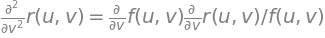

In [94]:
equation9 = Eq( diff(r,v,v) , solve( simplify(einst.tensor())[1,1].args[3] , diff(r,v,v) )[0] )
equation9 

In [96]:
vacuumFieldEquations = Matrix([equation6,equation7,equation8,equation9])
vacuumFieldEquations

⎡                                   ∂           ∂                            ⎤
⎢                    2             -──(r(u, v))⋅──(r(u, v))                  ⎥
⎢                   ∂               ∂u          ∂v                           ⎥
⎢                 ─────(r(u, v)) = ─────────────────────────                 ⎥
⎢                 ∂v ∂u                     r(u, v)                          ⎥
⎢                                                                            ⎥
⎢                           ∂           ∂             ∂           ∂          ⎥
⎢   2             2⋅f(u, v)⋅──(r(u, v))⋅──(r(u, v))   ──(f(u, v))⋅──(f(u, v))⎥
⎢  ∂                        ∂u          ∂v            ∂u          ∂v         ⎥
⎢─────(f(u, v)) = ───────────────────────────────── + ───────────────────────⎥
⎢∂v ∂u                          2                             f(u, v)        ⎥
⎢                              r (u, v)                                      ⎥
⎢                                                   